### Importing Required libraries

In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('D:\\Project\\VGSales\\vgsales.csv')
df.shape

(16598, 11)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [11]:
# Brief information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### From above we can observe that Year and Publisher columns has null values

In [110]:
df[df.Year.isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11


#### Year column has 271 Null values

In [109]:
df[df.Publisher.isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


#### Publisher column has 58 Null values

In [13]:
#Total no of games published by Nintendo
nintendo=df.loc[df.Publisher=='Nintendo',:]
print('Total games by Nintendo:{} '.format(len(nintendo)))

Total games by Nintendo:703 


In [17]:
print('% of Nintendo games in total: {}'.format((len(nintendo)/df.shape[0])*100))

% of Nintendo games in total: 4.2354500542234


## Top 10 game publishers in terms of count of games

In [93]:
df['Publisher'].value_counts().head(10)

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: Publisher, dtype: int64

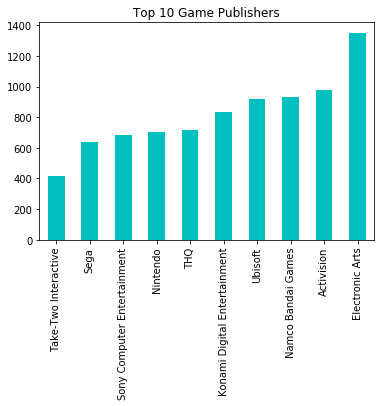

In [52]:
df['Publisher'].value_counts().head(10)[::-1].plot(kind='bar',color='c',title='Top 10 Game Publishers')

#### As we can see Electronic Arts tops the list with highest number of games published

## Top 10 game publishers with higher Global Median Sales

In [101]:
df.groupby('Publisher').Global_Sales.median().sort_values(ascending= False).head(10)

Publisher
Palcom                 4.170
Red Orb                2.620
Arena Entertainment    2.360
UEP Systems            2.250
RedOctane              1.745
Valve                  1.740
Hello Games            1.600
Westwood Studios       1.550
Maxis                  1.220
Black Label Games      1.200
Name: Global_Sales, dtype: float64

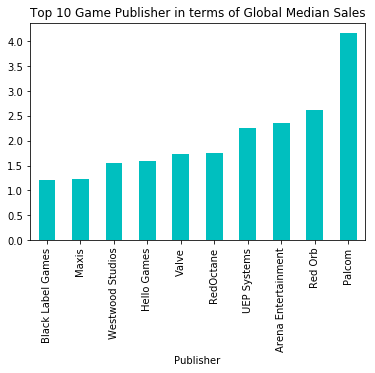

In [102]:
df.groupby('Publisher').Global_Sales.median().sort_values(ascending= False).head(10)[::-1].plot(kind='bar',color='C',title='Top 10 Game Publisher in terms of Global Median Sales')

#### From above we can observe that Palcom company has highest global median sales

## Top 10 Platforms for publishing games

In [29]:
df['Platform'].value_counts().head(10)

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: Platform, dtype: int64

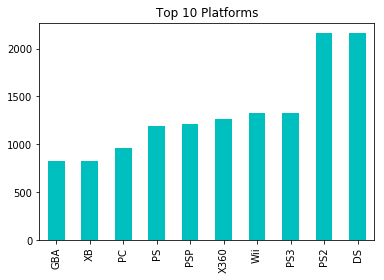

In [53]:
df['Platform'].value_counts().head(10)[::-1].plot(kind='bar',color='C',title='Top 10 Platforms')

#### DS Platform ranks 1st in terms of number of games published across different platforms

## Top 10 platforms with higher global median sales

In [98]:
df.groupby('Platform').Global_Sales.median().sort_values(ascending= False).head(10)

Platform
NES     1.375
GB      1.165
2600    0.460
SNES    0.320
X360    0.280
PS3     0.280
N64     0.270
PS      0.260
XOne    0.240
WiiU    0.230
Name: Global_Sales, dtype: float64

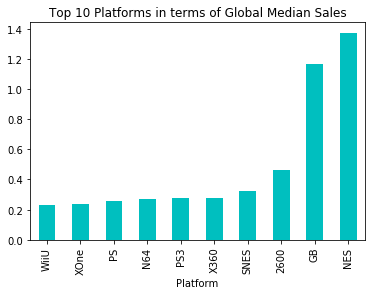

In [100]:
df.groupby('Platform').Global_Sales.median().sort_values(ascending= False).head(10)[::-1].plot(kind='bar',color='C',title='Top 10 Platforms in terms of Global Median Sales')

#### From above, we can observe that NES Platform has highest Global Median Sales

## Top 10 genres out of all games published

In [47]:
df['Genre'].value_counts().head(10)

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Name: Genre, dtype: int64

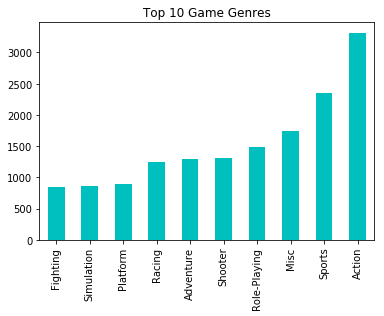

In [54]:
df['Genre'].value_counts().head(10)[::-1].plot(kind='bar',color='C',title='Top 10 Game Genres')

#### Action games are more published compared to other game genres

## Top 10 Game Genres with higher Global Median Sales

In [103]:
df.groupby('Genre').Global_Sales.median().sort_values(ascending= False).head(10)

Genre
Platform        0.280
Shooter         0.230
Sports          0.220
Fighting        0.210
Racing          0.190
Action          0.190
Role-Playing    0.185
Simulation      0.160
Misc            0.160
Puzzle          0.110
Name: Global_Sales, dtype: float64

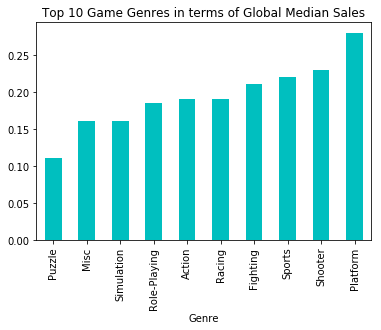

In [104]:
df.groupby('Genre').Global_Sales.median().sort_values(ascending= False).head(10)[::-1].plot(kind='bar',color='C',title='Top 10 Game Genres in terms of Global Median Sales')

#### From above we can observe that Platform Genre has highest Global Median Sales

## Top 10 games in terms of rank

Text(0.5,1,'Top 10 Ranked games v/s Sales')

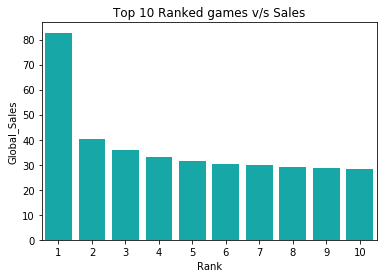

In [70]:
df_rank=df.loc[:,['Rank','Global_Sales']].head(10)
sns.barplot(x='Rank',y='Global_Sales',data=df_rank,color='C').set_title('Top 10 Ranked games v/s Sales')

In [32]:
electronic_arts=df.loc[df['Publisher']=='Electronic Arts',:]
electronic_arts['Platform'].value_counts().head(1)

PS2    199
Name: Platform, dtype: int64

#### PS2 Platform contributes more number of games for Electronic Arts Publisher

## Summary Statistics of given DataFrame

In [37]:
#Include Numerical as well as Categorical columns
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


#### From above, we can observe that
1. 1980 is the least year for any game to get published
2. Mean sales of games in North America is greater than other parts in the world

## Box plots for various continous columns in given DataFrame

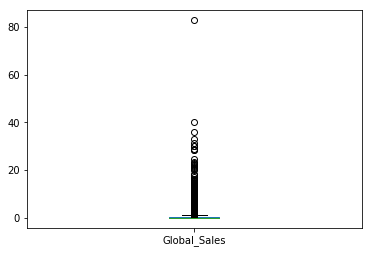

In [35]:
df['Global_Sales'].plot(kind='box')

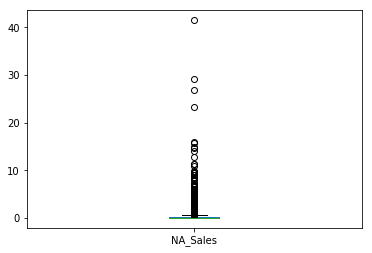

In [41]:
df['NA_Sales'].plot(kind='box')

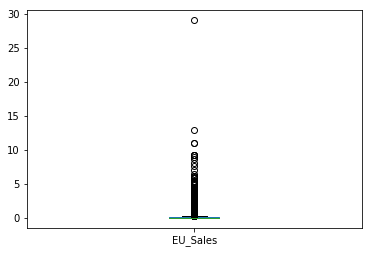

In [42]:
df['EU_Sales'].plot(kind='box')

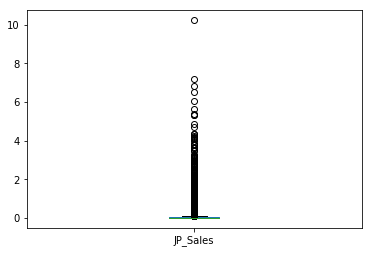

In [43]:
df['JP_Sales'].plot(kind='box')

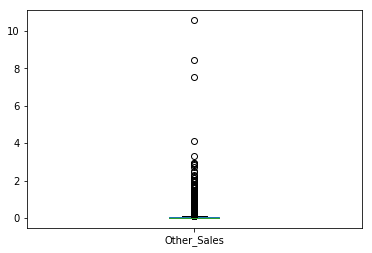

In [44]:
df['Other_Sales'].plot(kind='box')

## Histogram for various continous columns

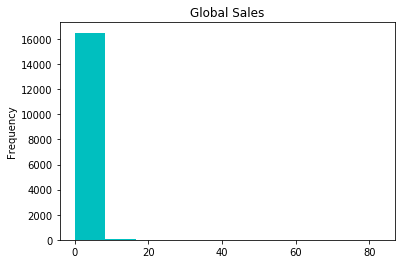

In [76]:
df['Global_Sales'].plot(kind='hist',color='C',title='Global Sales')

In [78]:
print('Skewness of Global sales:{}'.format(df['Global_Sales'].skew()))

Skewness of Global sales:17.400645097552452


#### Since skewness > 0 so it is left skewed

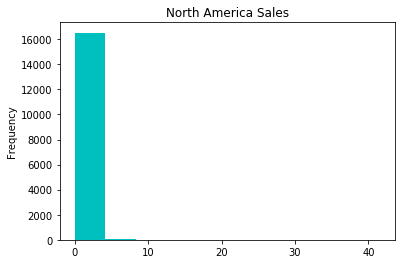

In [80]:
df['NA_Sales'].plot(kind='hist',color='C',title='North America Sales')

In [81]:
print('Skewness of North America sales:{}'.format(df['NA_Sales'].skew()))

Skewness of North America sales:18.799627403792297


#### Since skewness > 0 so it is left skewed

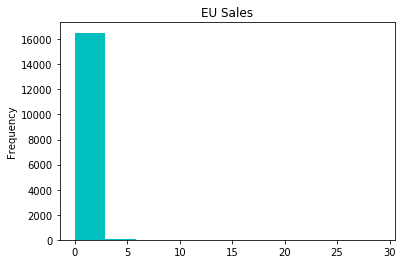

In [82]:
df['EU_Sales'].plot(kind='hist',color='C',title='EU Sales')

In [83]:
print('Skewness of EU sales:{}'.format(df['EU_Sales'].skew()))

Skewness of EU sales:18.875535100538038


#### Since skewness > 0 so it is left skewed

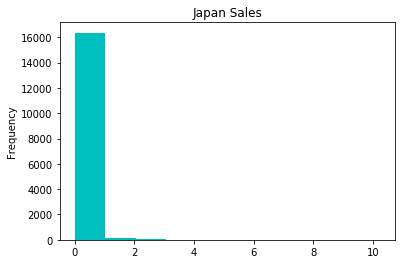

In [84]:
df['JP_Sales'].plot(kind='hist',color='C',title='Japan Sales')

In [85]:
print('Skewness of Japan sales:{}'.format(df['JP_Sales'].skew()))

Skewness of Japan sales:11.206458372215543


#### Since skewness > 0 so it is left skewed

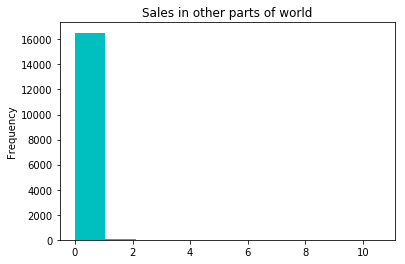

In [87]:
df['Other_Sales'].plot(kind='hist',color='C',title='Sales in other parts of world')

In [88]:
print('Skewness of Other parts in world sales:{}'.format(df['Other_Sales'].skew()))

Skewness of Other parts in world sales:24.233922531429613


#### Since skewness > 0 so it is left skewed

## KDE Plot for various Continous columns

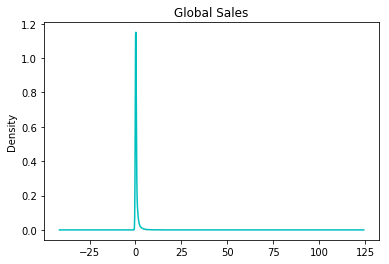

In [75]:
df['Global_Sales'].plot(kind='kde',color='C',title='Global Sales')

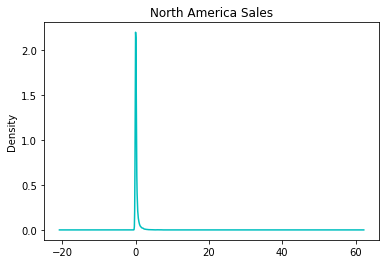

In [89]:
df['NA_Sales'].plot(kind='kde',color='C',title='North America Sales')

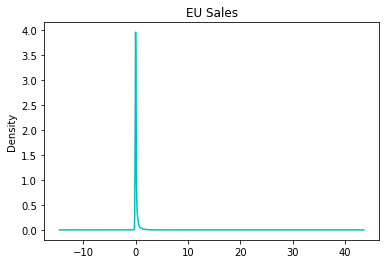

In [90]:
df['EU_Sales'].plot(kind='kde',color='C',title='EU Sales')

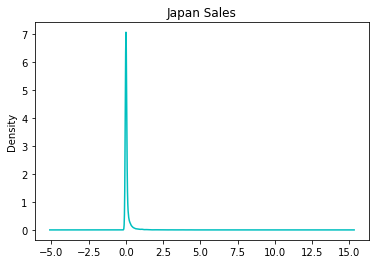

In [91]:
df['JP_Sales'].plot(kind='kde',color='C',title='Japan Sales')

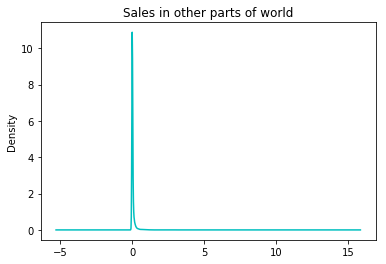

In [92]:
df['Other_Sales'].plot(kind='kde',color='C',title='Sales in other parts of world')